# RUSSE-2018

In [47]:
! git clone https://github.com/nlpub/russe-wsi-kit.git

fatal: destination path 'russe-wsi-kit' already exists and is not an empty directory.


In [48]:
! python3 russe-wsi-kit/evaluate.py russe-wsi-kit/data/main/wiki-wiki/train.baseline-adagram.csv

word	ari	count
бор	0.591175	56
замок	0.495386	138
лук	0.637076	110
суда	0.005465	135
	0.392449	439


In [49]:
! pip install ruwordnet

In [50]:
! ruwordnet download

downloading a ruwordnet model from https://github.com/avidale/python-ruwordnet/releases/download/0.0.2/ruwordnet.db


In [51]:
from ruwordnet import RuWordNet
import pandas as pd
from tqdm.auto import tqdm
import torch
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestCentroid
import numpy as np

wn = RuWordNet()

In [52]:
def ruwordnet_comparison(filepath):
    '''
    Function processes the given dataframe and 
    returns the number of senses for each word
    '''

    df = pd.read_csv(filepath, sep='\t')
    grouped_df = df.groupby('word')
    grouped_df = grouped_df.agg({'gold_sense_id': "nunique"})
    grouped_df = grouped_df.reset_index()
    grouped_df['ruwordnet_num_senses'] = grouped_df['word'].apply(lambda x: len(wn.get_senses(x)))
    grouped_df['deviation'] = - grouped_df['gold_sense_id'] + grouped_df['ruwordnet_num_senses']
    
    return grouped_df

In [53]:
df_wiki_train = ruwordnet_comparison('/content/russe-wsi-kit/data/main/wiki-wiki/train.csv')
df_wiki_train

,word,gold_sense_id,ruwordnet_num_senses,deviation
0,бор,2,2,0
1,замок,2,2,0
2,лук,2,3,1
3,суда,2,0,-2


In [54]:
df_wiki_train.deviation.median()

0.0

In [55]:
df_wiki_test = ruwordnet_comparison('/content/russe-wsi-kit/data/main/wiki-wiki/test.csv')
df_wiki_test

,word,gold_sense_id,ruwordnet_num_senses,deviation
0,банка,0,2,2
1,белка,0,1,1
2,бит,0,1,1
3,горе,0,2,2
4,гранат,0,3,3
5,граф,0,2,2
6,душ,0,2,2


In [56]:
df_bts_train = ruwordnet_comparison('/content/russe-wsi-kit/data/main/bts-rnc/train.csv')
df_bts_train

,word,gold_sense_id,ruwordnet_num_senses,deviation
0,балка,2,2,0
1,вид,3,5,2
2,винт,4,3,-1
3,горн,3,2,-1
4,губа,3,3,0
5,жаба,4,1,-3
6,клетка,6,4,-2
7,крыло,8,6,-2
8,купюра,2,2,0
9,курица,2,2,0


In [57]:
df_bts_train.deviation.median()

0.0

In [58]:
df_bts_test = ruwordnet_comparison('/content/russe-wsi-kit/data/main/bts-rnc/test.csv')
df_bts_test

,word,gold_sense_id,ruwordnet_num_senses,deviation
0,акция,0,2,2
1,баба,0,0,0
2,байка,0,2,2
3,бум,0,1,1
4,бычок,0,1,1
5,вал,0,3,3
6,газ,0,4,4
7,гвоздика,0,2,2
8,гипербола,0,0,0
9,град,0,2,2


In [59]:
df_active_train = ruwordnet_comparison('/content/russe-wsi-kit/data/main/active-dict/train.csv')
df_active_train

,word,gold_sense_id,ruwordnet_num_senses,deviation
0,дар,3,2,-1
1,двигатель,2,2,0
2,двойник,4,1,-3
3,дворец,2,1,-1
4,девятка,9,0,-9
...,...,...,...,...
80,злоупотребление,2,2,0
81,знак,7,3,-4
82,знамя,2,1,-1
83,значение,4,3,-1


In [60]:
df_active_train.deviation.median()

-1.0

In [61]:
df_active_test = ruwordnet_comparison('/content/russe-wsi-kit/data/main/active-dict/test.csv')
df_active_test

,word,gold_sense_id,ruwordnet_num_senses,deviation
0,давление,0,4,4
1,дама,0,2,2
2,данные,0,1,1
3,дата,0,2,2
4,двойка,0,1,1
...,...,...,...,...
163,зона,0,1,1
164,зонтик,0,2,2
165,зоология,0,1,1
166,зубр,0,1,1


In [62]:
! pip install transformers

# Variance estimator

In [63]:
from transformers import AutoTokenizer, AutoModel, BertConfig

config = BertConfig.from_pretrained("cointegrated/rubert-tiny", output_hidden_states=True)
tokenizer = AutoTokenizer.from_pretrained("cointegrated/rubert-tiny")
model = AutoModel.from_pretrained("cointegrated/rubert-tiny", config=config)

Some weights of the model checkpoint at cointegrated/rubert-tiny were not used when initializing BertModel: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.decoder.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [64]:
def mask_sent(x):
    '''
    Replaces the first instance of target word by [MASK]
    using the given char positions
    '''
    try:
        start_id = x.positions.split(',')[0].split('-')[0].strip()
        end_id = x.positions.split(',')[0].split('-')[1].strip()
        masked = x.context.replace(x.context[int(start_id) : int(end_id)], '[MASK]', 1)
        return masked
    except:
        return x

In [65]:
def BERT_MASK(masked, model, tokenizer):
    '''
    Function extracts masked words vectors 
    as outputs from the last layers
    '''

    embs = []
    for line in tqdm(masked, total=len(masked)):
        try:
            input = tokenizer.encode(line, return_tensors="pt")
            mask_token_index = torch.where(input == tokenizer.mask_token_id)
         
            token_logits = model(input, return_dict=True)["hidden_states"]
            mask_token_logits = token_logits[-1].squeeze()[mask_token_index, :][0]
            embs.append(mask_token_logits.detach().numpy())
        except Exception as e:
            print(line)
            print(e)
            
    return np.array(embs)

In [66]:
def get_idxs(word, sent):
    idx = 0
    enc = [tokenizer.encode(x) for x in sent.split()]
    desired_output = []
    for token in enc:
        tokenoutput = []
        for ids in token:
          tokenoutput.append(idx)
          idx += 1
        desired_output.append(tokenoutput)
    try:
        out = desired_output[sent.split().index(word.strip())]
    except:
        out = desired_output[sent.split().index(word.strip()[:-1])]
    return out

In [67]:
def BERT_TOKENS(idxs, lines, model, tokenizer):
    '''
    Function extracts words vectors 
    as outputs from the last layer
    '''

    embs = []
    for idx, line in tqdm(zip(idxs, lines), total=len(lines)):
        start_id = int(idx.split(',')[0].split('-')[0].strip())
        end_id = int(idx.split(',')[0].split('-')[1].strip())
        word = line[start_id : end_id]
        input = tokenizer.encode(line, return_tensors="pt")
        tokenized_sent = tokenizer.tokenize(line)
        sent_logits = model(input, return_dict=True)["last_hidden_state"]
        if word in tokenized_sent:
            word_index = list(np.where(np.array(tokenized_sent) == word)[0])[0]
            # print(word_index, sent_logits.size())
            word_embedding = sent_logits[:, word_index, :].cpu().detach().numpy()
            embs.append(word_embedding)
        else:
            # in case the word is divided in more than 2 pieces:
            splitted_tokens = []
            splitted_array = np.zeros((1, 768))
            prev_token = ""
            prev_array = np.zeros((1, 768))
            for i, token_i in enumerate(tokenized_sent):
                array = sent_logits[:, i, :].cpu().detach().numpy()
                token_i = token_i.lower()

                # Find the word divided into several byte-pair encodings
                if token_i.startswith('##'):

                    if prev_token:
                        splitted_tokens.append(prev_token)
                        prev_token = ""
                        splitted_array = prev_array

                    splitted_tokens.append(token_i)
                    splitted_array += array

                else:
                    if splitted_tokens:
                        sarray = splitted_array/len(splitted_tokens)
                        stoken_i = "".join(splitted_tokens).replace('##', '')
                        if stoken_i.lower() == word:
                            # replace in the tokenized sentence the divided word by the full word
                            # tokenized_sent[i-len(splitted_tokens):i] = word
                            word_embedding = np.array(sarray)
                            # keep all the embs of the sentence, to select only one randomly
                        splitted_tokens = []
                        splitted_array = np.zeros((1, 768))
                    prev_array = array
                    prev_token = token_i
            embs.append(word_embedding)            

    return np.array(embs)

In [68]:
def variance_counter(df):
    '''Function calculates the variance for each word vectors distribution 
    extracted from the dataset'''

    word_dict = {}
    y = []
    print('Dataset includes {} words'.format(len(df.word.unique())))
    # Collect embeddings and cluster tags
    for i, word in enumerate(df.word.unique()):
        # print(word)
        word_dict[word] = BERT_TOKENS(df[df.word == word]['positions'].tolist(), df[df.word == word]['context'].tolist(), model, tokenizer)
        y += [i] * word_dict[word].shape[0]
    # Get cluster centroids by cosine distance estimation
    clf = NearestCentroid(metric='cosine')
    x = np.concatenate([*word_dict.values()]).squeeze()
    y = np.array(y)
    centroids = clf.fit(x, y).centroids_
    variances = {word : np.sum(cosine_similarity(word_dict[word].squeeze(), centroids[0].reshape(1, -1)) ** 2) / word_dict[word].shape[0] \
                  for i, word in enumerate(word_dict.keys())}
    selfsim = {word : np.sum(cosine_similarity(word_dict[word].squeeze(), word_dict[word].squeeze())) \
                  for i, word in enumerate(word_dict.keys())}
                 
    return variances, selfsim

In [69]:
df = pd.read_csv('/content/russe-wsi-kit/data/main/wiki-wiki/train.csv', sep='\t')

In [70]:
BERT_TOKENS(df[df.word == 'лук'].positions.tolist(), df[df.word == 'лук'].context.tolist(), model, tokenizer)

  0%|          | 0/110 [00:00<?, ?it/s]

array([[[ 0.9536836 ,  0.7400029 , -0.13351172, ..., -0.84186256,
          0.9194396 , -0.34409177]],

       [[ 0.9113071 ,  0.3237475 ,  1.1383075 , ...,  0.9854612 ,
          1.0798383 , -0.06226783]],

       [[ 0.8355117 ,  0.82344323,  0.42718104, ...,  0.25856915,
          0.78007853,  0.11003634]],

       ...,

       [[ 1.173342  ,  0.7378855 ,  1.5868162 , ..., -0.31948292,
          1.6287901 , -0.3620635 ]],

       [[-0.36549044,  1.1044722 ,  1.2528272 , ...,  0.7693773 ,
          1.6360238 , -1.0070838 ]],

       [[ 1.435274  , -0.12102968,  1.689151  , ..., -0.1911169 ,
          1.0428829 , -0.44200793]]], dtype=float32)

In [71]:
! pip install ruword_frequency

In [72]:
from ruword_frequency import Frequency
freq = Frequency()
freq.load()

freq.ipm('привет')

45.22614669799805

In [73]:
def collect_data(filename):
    '''
    The function transforms RUSSE dataset into list of tuples
    where for each word its frequency, vector variation and number of senses are calculated
    '''

    df = pd.read_csv(filename, sep='\t')
    df['masked_sent'] = df.apply(lambda x: mask_sent(x), axis=1)
    var_dict, selfsim_dict = variance_counter(df)
    freq_dict = {word: freq.ipm(word) for word in var_dict.keys()}
    num_sense_dict = {word: len(wn.get_senses(word)) for word in var_dict.keys()}
    data_list = []
    for word in var_dict.keys():
        data_list.append((word, var_dict[word], selfsim_dict[word], freq_dict[word], num_sense_dict[word]))
    return data_list

In [74]:
paths = ['/content/russe-wsi-kit/data/main/wiki-wiki/test.csv', '/content/russe-wsi-kit/data/main/wiki-wiki/train.csv']

In [75]:
full_data = []
for path in tqdm(paths):
    full_data.extend(collect_data(path))
df_features = pd.DataFrame(full_data, columns=['words', 'variation', 'selfsim', 'frequency', 'num_senses'])

  0%|          | 0/2 [00:00<?, ?it/s]

Dataset includes 7 words


  0%|          | 0/112 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/84 [00:00<?, ?it/s]

  0%|          | 0/60 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/148 [00:00<?, ?it/s]

  0%|          | 0/79 [00:00<?, ?it/s]

Dataset includes 4 words


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


  0%|          | 0/138 [00:00<?, ?it/s]

  0%|          | 0/110 [00:00<?, ?it/s]

  0%|          | 0/135 [00:00<?, ?it/s]

  0%|          | 0/56 [00:00<?, ?it/s]

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_nearest_centroid.py:165: UserWarning: Averaging for metrics other than euclidean and manhattan not supported. The average is set to be the mean.
  "Averaging for metrics other than "


In [76]:
df_features

,words,variation,selfsim,frequency,num_senses
0,банка,0.333657,4009.946289,23.197741,2
1,белка,0.155137,10749.687500,6.400473,1
2,бит,0.084797,1717.354736,2.108464,1
3,горе,0.096534,1182.947998,66.901649,2
4,гранат,0.115817,267.814392,11.455260,3
5,граф,0.088759,6208.439453,66.465096,2
6,душ,0.099595,3693.738281,30.884327,2
7,замок,0.312749,5839.265137,82.688484,2
8,лук,0.220376,6756.020508,28.050032,3
9,суда,0.084403,7675.425781,43.419243,0


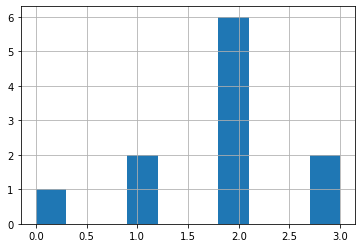

In [77]:
df_features.num_senses.hist()

In [78]:
df_features.to_csv('df_features.csv')

In [79]:
from sklearn.model_selection import train_test_split

X = df_features[['variation', 'selfsim', 'frequency']].to_numpy()
y = df_features[['num_senses']].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [80]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

In [81]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(y_test, y_pred))

0.7956404575195819


In [82]:
df_features['pred_num_senses'] = reg.predict(X)

In [83]:
df_features

,words,variation,selfsim,frequency,num_senses,pred_num_senses
0,банка,0.333657,4009.946289,23.197741,2,2.293625
1,белка,0.155137,10749.687500,6.400473,1,1.037357
2,бит,0.084797,1717.354736,2.108464,1,2.470321
3,горе,0.096534,1182.947998,66.901649,2,1.872506
4,гранат,0.115817,267.814392,11.455260,3,2.664932
5,граф,0.088759,6208.439453,66.465096,2,1.023731
6,душ,0.099595,3693.738281,30.884327,2,1.851672
7,замок,0.312749,5839.265137,82.688484,2,1.301384
8,лук,0.220376,6756.020508,28.050032,3,1.582843
9,суда,0.084403,7675.425781,43.419243,0,1.022640


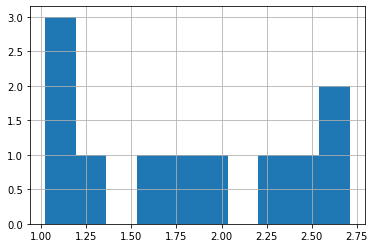

In [84]:
df_features.pred_num_senses.hist()

In [85]:
from sklearn.linear_model import LogisticRegression

reg = LogisticRegression().fit(X_train, y_train)
y_pred = reg.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [86]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.0

In [87]:
df_features['pred_num_senses_clf'] = reg.predict(X)

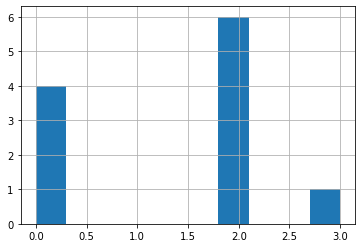

In [88]:
df_features.pred_num_senses_clf.hist()

In [89]:
reg.coef_[0]

array([0.15202202, 0.00172705, 0.16289213])

In [90]:
df_features

,words,variation,selfsim,frequency,num_senses,pred_num_senses,pred_num_senses_clf
0,банка,0.333657,4009.946289,23.197741,2,2.293625,2
1,белка,0.155137,10749.687500,6.400473,1,1.037357,0
2,бит,0.084797,1717.354736,2.108464,1,2.470321,2
3,горе,0.096534,1182.947998,66.901649,2,1.872506,2
4,гранат,0.115817,267.814392,11.455260,3,2.664932,2
5,граф,0.088759,6208.439453,66.465096,2,1.023731,0
6,душ,0.099595,3693.738281,30.884327,2,1.851672,2
7,замок,0.312749,5839.265137,82.688484,2,1.301384,0
8,лук,0.220376,6756.020508,28.050032,3,1.582843,3
9,суда,0.084403,7675.425781,43.419243,0,1.022640,0


In [91]:
df_features.pred_num_senses = df_features.pred_num_senses.round()

In [92]:
df_features

,words,variation,selfsim,frequency,num_senses,pred_num_senses,pred_num_senses_clf
0,банка,0.333657,4009.946289,23.197741,2,2.0,2
1,белка,0.155137,10749.687500,6.400473,1,1.0,0
2,бит,0.084797,1717.354736,2.108464,1,2.0,2
3,горе,0.096534,1182.947998,66.901649,2,2.0,2
4,гранат,0.115817,267.814392,11.455260,3,3.0,2
5,граф,0.088759,6208.439453,66.465096,2,1.0,0
6,душ,0.099595,3693.738281,30.884327,2,2.0,2
7,замок,0.312749,5839.265137,82.688484,2,1.0,0
8,лук,0.220376,6756.020508,28.050032,3,2.0,3
9,суда,0.084403,7675.425781,43.419243,0,1.0,0


In [93]:
df_features.to_csv('pred_num_sences.csv')